## Importing Necessary Library

In [4]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [5]:
df=pd.read_csv('loan.csv')

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
df.shape

(39717, 111)

## Data Cleaning

### Drop Empty Columns

In [9]:
empty_columns = df.columns[df.isna().sum() == len(df)].to_list()
df1 = df.drop(columns=empty_columns)
df1.shape

(39717, 57)

### Drop Single Valued Column

In [10]:
col1 = df1.columns[df1.nunique()==1].to_list()
df2= df1.drop(columns=col1)
df2.shape

(39717, 48)

### Drop columns having more than 60% of missing values

In [11]:
check = df2.isnull().mean() * 100
cols = check[check > 60].index
df3=df2.drop(list(cols),axis=1)
df3.shape

(39717, 45)

#### There are some unnecessary columns which  donot help in analysis - id,member_id, emp_title, url, desc, title,zip_code,addr_state

In [12]:
cols = ['id','member_id', 'emp_title', 'url', 'desc', 'title','zip_code','addr_state','pub_rec_bankruptcies',
        'last_pymnt_d','last_pymnt_amnt',"last_credit_pull_d","out_prncp_inv"]
df4=df3.drop(list(cols),axis=1)
df4.shape

(39717, 32)

In [13]:
df4.isnull().mean() * 100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0

## Update Missing Value 
#### There are 2 columns with missing value emp_length,revol_util

In [14]:
mod=df4['emp_length'].mode()[0]
print('Mode:',mod)

Mode: 10+ years


#### we are replacing missing values with mode value

In [15]:
df4["emp_length"]=df4["emp_length"].fillna(mod) 

#### "revol_util" column although described as an object column, it has continous values and number of missing values are very less, so we are dropping columns having missing values

In [16]:
df4.shape


(39717, 32)

In [17]:
df4.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df4.revol_util.isna().sum()
df4.shape

(39667, 32)

In [18]:
df4.isnull().mean() * 100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
dtype: f

### Standardizing the data

In [19]:
df4.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

#### Convert columns having percentages as interests data type from object to floating type

In [20]:
print(df4[['int_rate', 'revol_util']].head())


  int_rate revol_util
0   10.65%     83.70%
1   15.27%      9.40%
2   15.96%     98.50%
3   13.49%        21%
4   12.69%     53.90%


In [21]:
df4['int_rate'] = df4['int_rate'].str.replace('%', '').astype(float)
df4['revol_util'] = df4['revol_util'].str.replace('%', '').astype(float)

In [22]:
print(df4[['int_rate', 'revol_util']].head())

   int_rate  revol_util
0     10.65        83.7
1     15.27         9.4
2     15.96        98.5
3     13.49        21.0
4     12.69        53.9


### "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }, so we are changing the vlaues accordingly

In [23]:
df4['emp_length'] =df4['emp_length'].apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])).astype(int)
print(df4['emp_length'])

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39667, dtype: int32


In [24]:
df4.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int32
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int       

### Converting issue_d and earliest_cr_line to datetime data type

In [25]:
df4['issue_d'] = df4['issue_d'].apply(lambda x: pd.to_datetime(x, format='%b-%y'))
df4['earliest_cr_line'] = df4['earliest_cr_line'].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [26]:
df4.nunique()

loan_amnt                    884
funded_amnt                 1040
funded_amnt_inv             8195
term                           2
int_rate                     371
installment                15363
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5313
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
total_pymnt                37800
total_pymnt_inv            37470
total_rec_prncp             7963
total_rec_int              35105
total_rec_late_fee          1353
recoveries

#### term, grade, sub_grade,verification_status, loan_status,purpose as cteagorical column so consider these as object type

## Dropping data which are not relevant


In [27]:
print(df4['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


## The purpose of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
### We cannot make anything up for the current loans.
### To exclude that data , removing the records with current loan status

In [28]:
final_data = df4[df4['loan_status'] != "Current"]
final_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [29]:
final_data.shape

(38527, 32)

In [30]:
final_data.nunique()

loan_amnt                    869
funded_amnt                 1018
funded_amnt_inv             8040
term                           2
int_rate                     370
installment                15002
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5210
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util                  1088
total_acc                     82
out_prncp                      1
total_pymnt                36664
total_pymnt_inv            36339
total_rec_prncp             6828
total_rec_int              33982
total_rec_late_fee          1317
recoveries

### Handling Outliners
##### We can analyze on 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc','dti',, 'revol_bal', 'revol_util' columns as we found these important for analysis

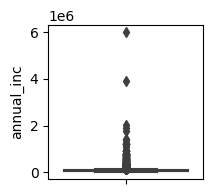

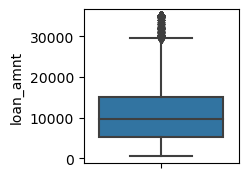

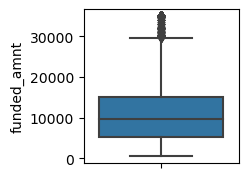

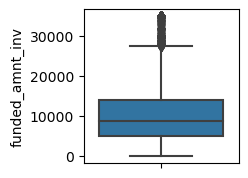

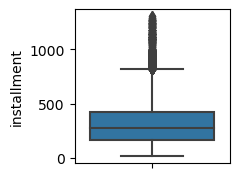

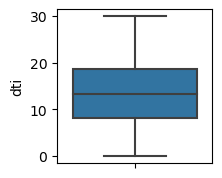

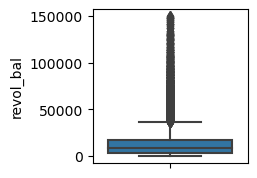

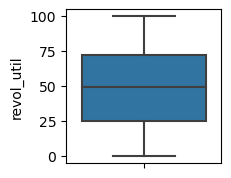

In [31]:
columns_to_plot = ['annual_inc','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'dti', 'revol_bal', 'revol_util']

for col_name in columns_to_plot:
    plt.figure(figsize=(2, 2))
    sns.boxplot(y=final_data[col_name])
    plt.show()

### These plot clearly represents presence of some outliners so removing them. 



In [32]:
quantile_info = final_data['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [33]:
quant_95_value= final_data['annual_inc'].quantile(0.95)
final_data = final_data[final_data.annual_inc <= quant_95_value]
final_data.shape

(36606, 32)

#### for annual_inc considering only till 95 percentile as values after this seems to be outliners.

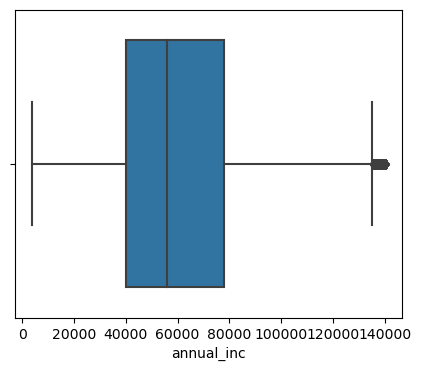

In [34]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=final_data['annual_inc'])
plt.show()

In [35]:
quantile_info = final_data['loan_amnt'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [36]:
quantile_info = final_data['funded_amnt'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9000.0
0.75    14400.0
0.90    20000.0
0.95    25000.0
0.97    25000.0
0.98    28100.0
0.99    34000.0
Name: funded_amnt, dtype: float64

## Arranging the fields in Categorical, Numerical and Date variables
### Unordered Categorical Variables
- term - 36 or 60 months
- grade - LC assigned loan grade
- sub_grade - it is sub-division of grade
- home_ownership - home ownership status RENT, OWN, MORTGAGE, OTHER.
- verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified
- loan_status
- purpose

### Ordered Categorical Variables
- emp_length - Employment length in years
- inq_last_6mths - The number of inquiries in past 6 months

## Quantitative Variables
- loan_amnt
- funded_amnt
- funded_amnt_inv - This is almost same as 'funded_amnt' field
- int_rate
- installment
- annual_inc
- dti 
- delinq_2yrs
- pub_rec
- total_rec_prncp- Principal received to date
- revol_bal
- revol_util 
- total_acc
- open_acc

## Date Variables
- issue_d
- earliest_cr_line

# Univariate Analysis

In [37]:
# This function sums the total by the categorical variable we are analyzing
def bycategory(x):
    ax = sns.countplot(x=final_data[x], order = final_data[x].value_counts().index)
    for i in ax.containers:
        ax.bar_label(i,)
    ax.tick_params(axis='x', rotation=90)
    return ax

In [38]:
# This function plots percentages by loan status 
def byloanstatuspercent(x):
    cross_tab_prop = pd.crosstab(index=final_data[x],
                             columns=final_data['loan_status'],
                             normalize="index")
    ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 5))

    plt.legend( ncol=2)
    plt.xlabel(x)
    plt.ylabel("% of Total")
    plt.xticks(rotation=0)
    
    
    
    
    for n, x in enumerate([*cross_tab_prop.index.values]):
        for proportion in cross_tab_prop.loc[x]:
            plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
    
    return ax
                
  

## Term

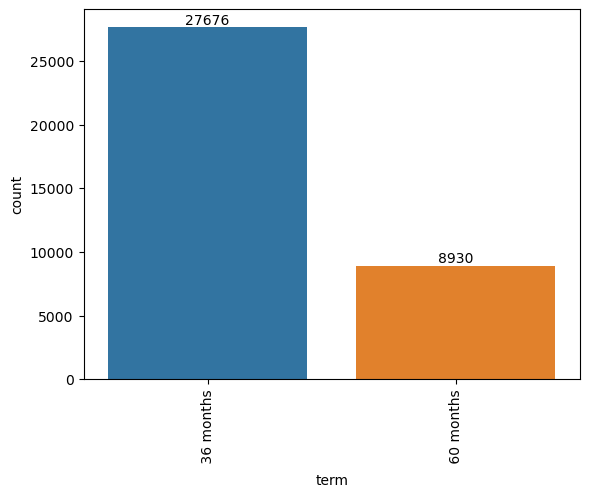

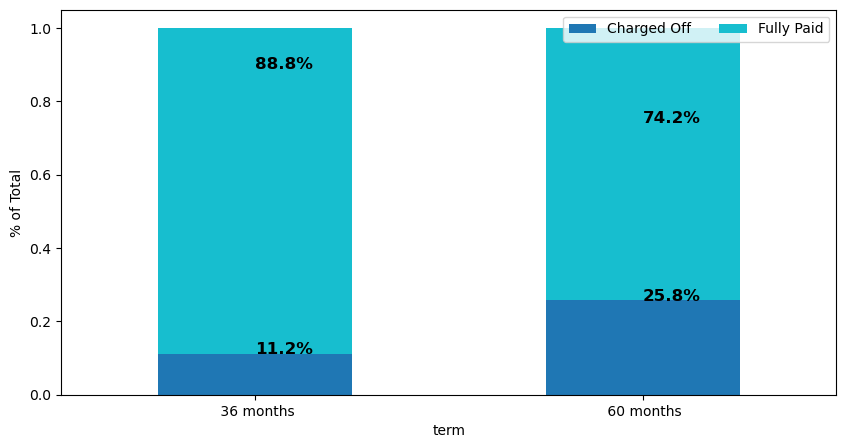

In [39]:
bycategory('term')
byloanstatuspercent('term')
plt.show()

**Observations:**

* 36 months term loans are more common than 60 months
* 60 months term loans are more likely to default

## Grade

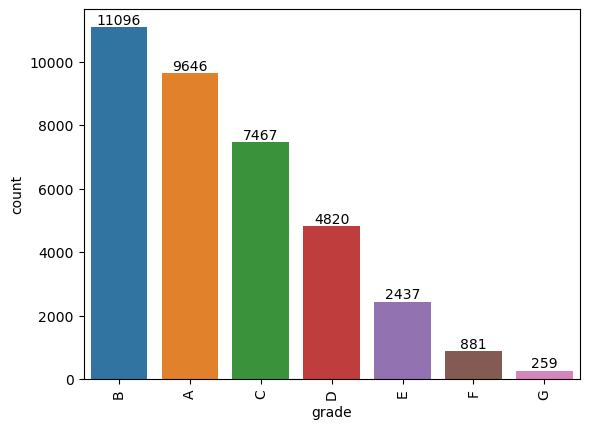

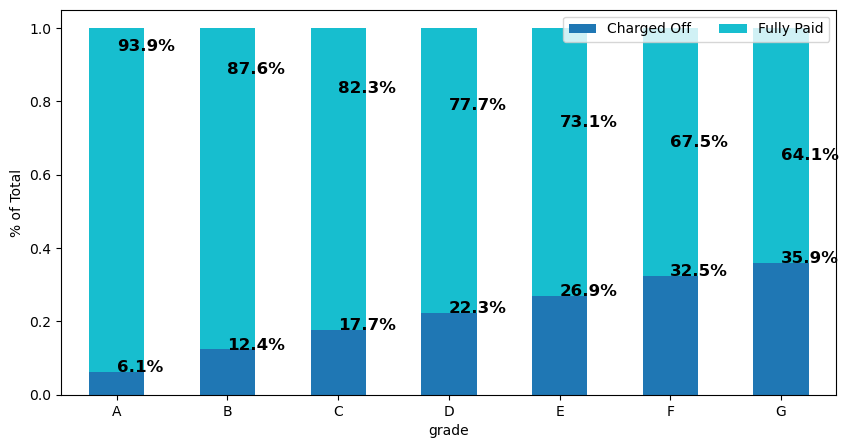

In [40]:
bycategory('grade')
byloanstatuspercent('grade')
plt.show()

**Observations:**
* more than 50% of loans are of high grade, A or B
* Grade and chances of default are inversely proportaional. We can say Lending Club is quite good at grading it's loans

## Home Ownership

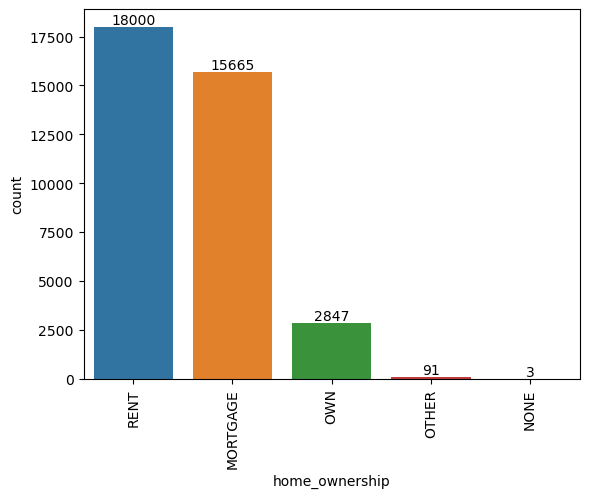

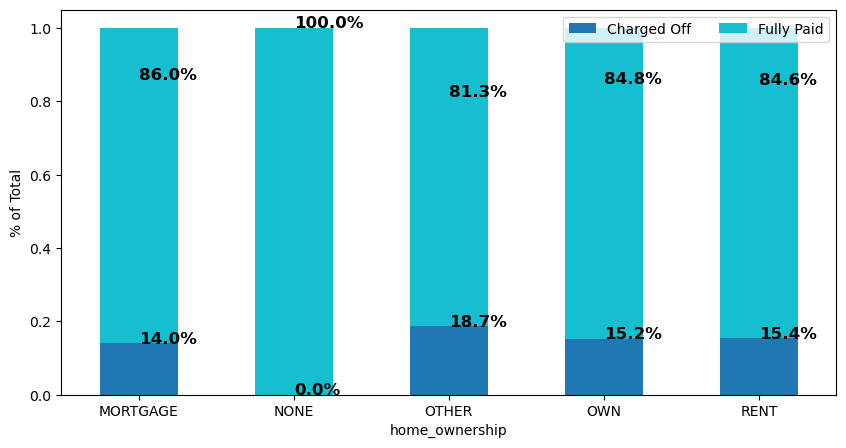

In [41]:
bycategory('home_ownership')
byloanstatuspercent('home_ownership')
plt.show()

**Observations:**
* Most of the loans are by people on rent or mortgage
* There is no significant impact of home ownership on default

## Verification

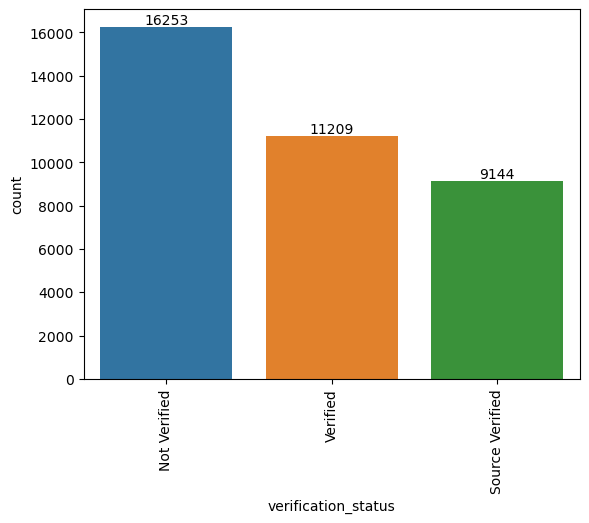

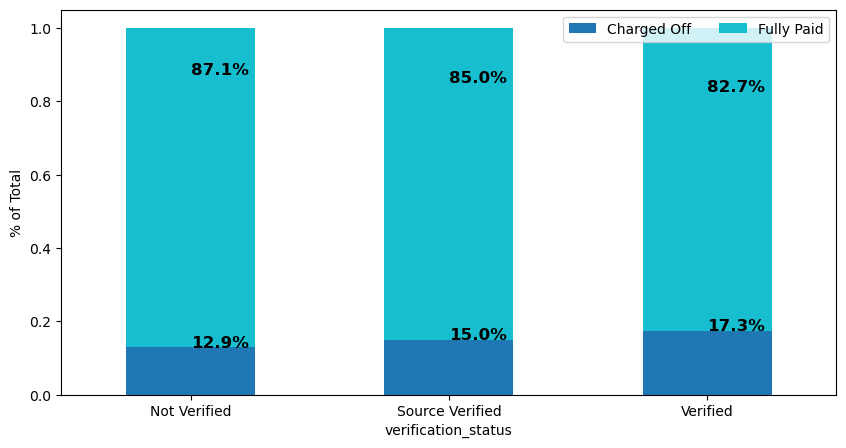

In [42]:
bycategory('verification_status')
byloanstatuspercent('verification_status')
plt.show()

**Observations:**
* Almost 50% of the loans are not verified
* The chances of default for verified loans are more than not verified loans which is quite counter-intuitive

## pub_rec

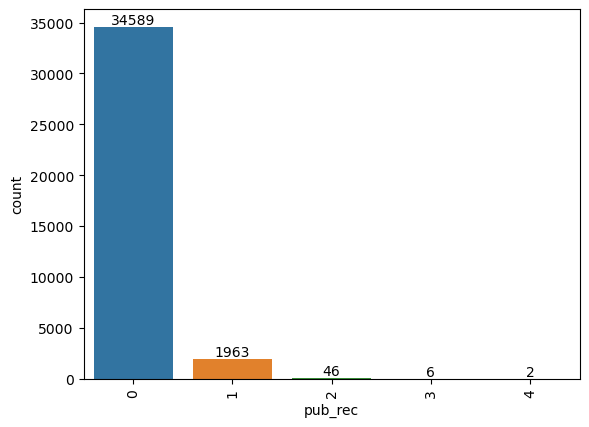

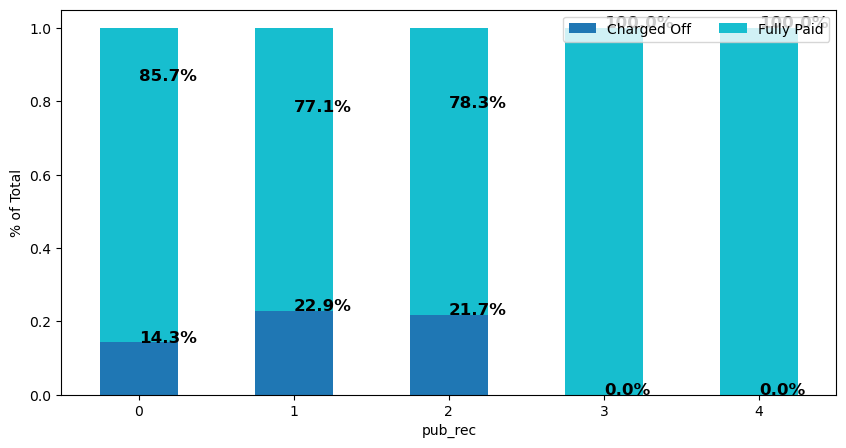

In [43]:
bycategory('pub_rec')
byloanstatuspercent('pub_rec')
plt.show() 

**Observations:**
* Chances of default increases significantly when borrower has prior derogatory public record

## Employee Length

<AxesSubplot: xlabel='emp_length', ylabel='% of Total'>

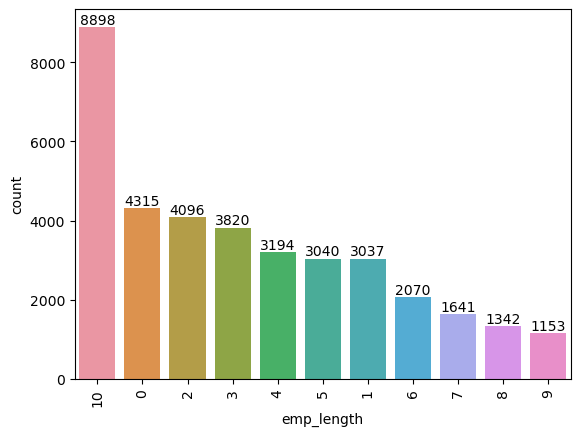

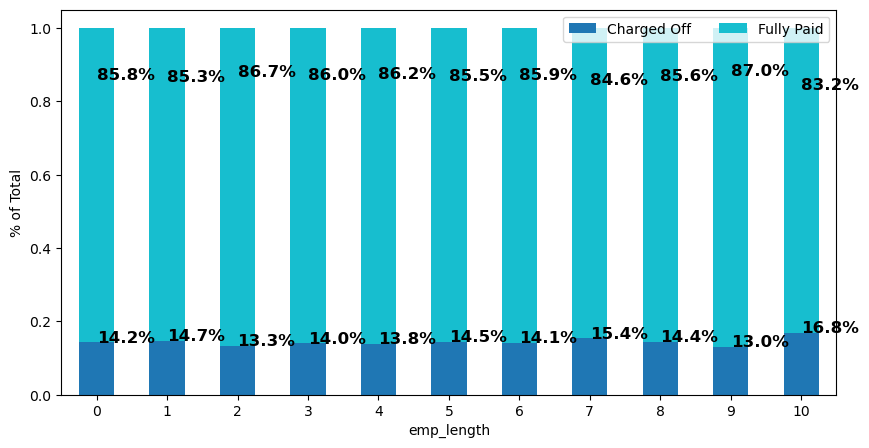

In [44]:
bycategory('emp_length')

byloanstatuspercent('emp_length')

**Observations:**
* There is no significant impact of employee length on loan default

## Purpose

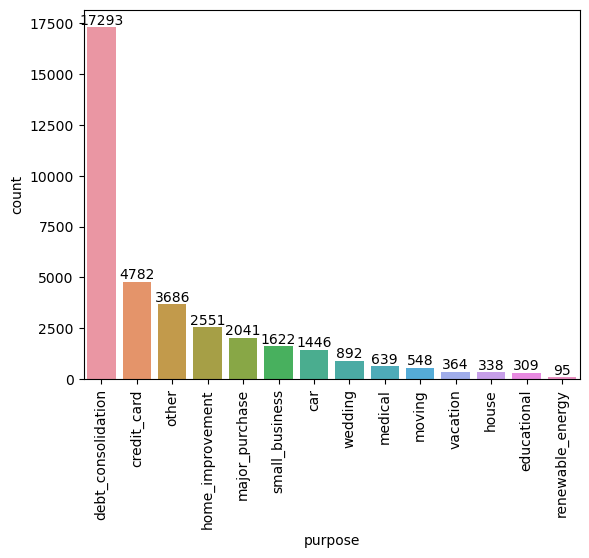

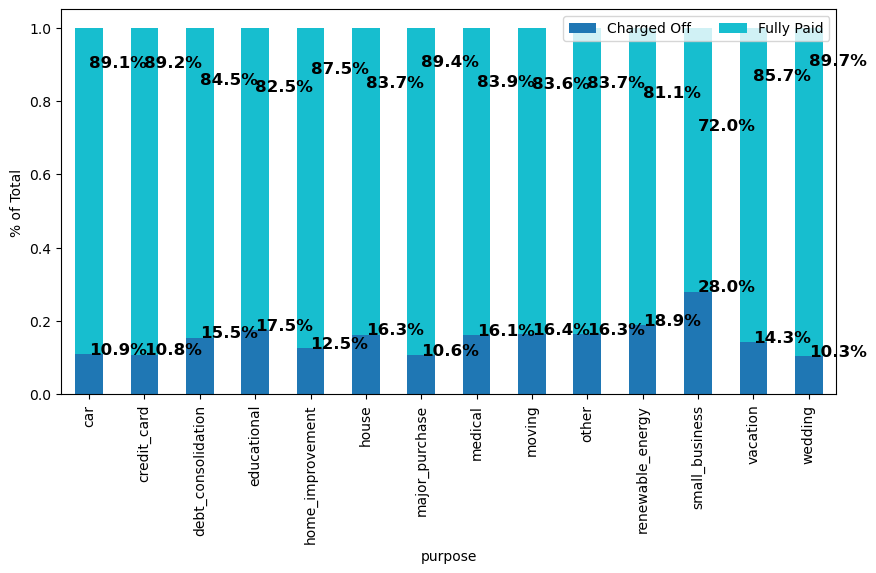

In [45]:
bycategory('purpose')
plt.show()
byloanstatuspercent('purpose')
plt.xticks(rotation=90)
plt.show()

**Observations:**
* Debt consolidation comprises of almost 49% of the loans, followed by credit card
* 27.1% of loans to small businesses are defaulted, making them the most risky ones

## inq_last_6mths

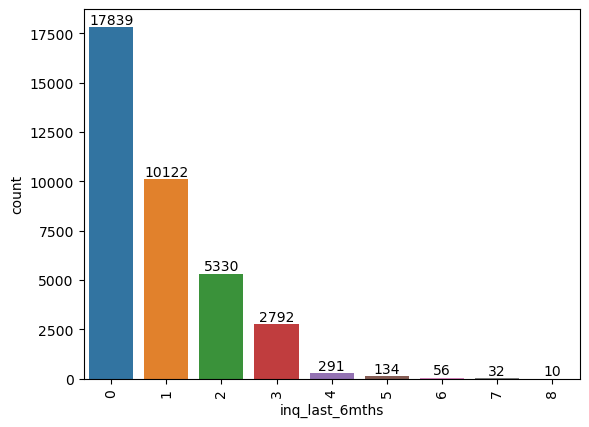

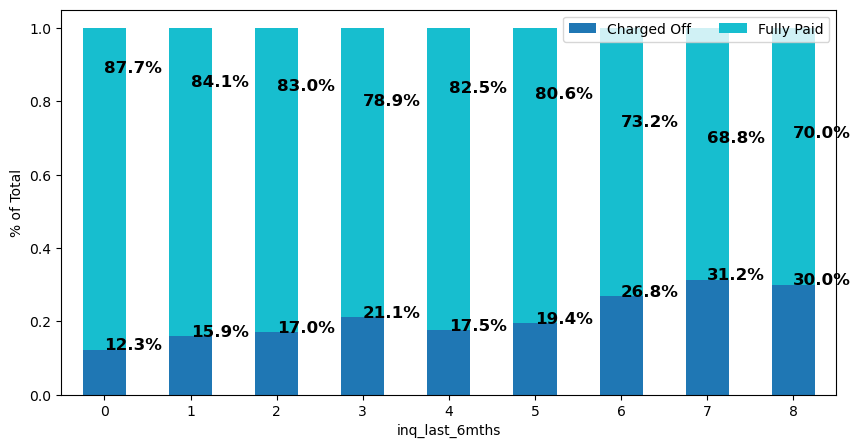

In [46]:
bycategory('inq_last_6mths')

byloanstatuspercent('inq_last_6mths')
plt.show()

**Observations:**
* Highest number of loans never had any inquiry and are less likely to default
* Loans with more than 2 inquiries has higher rate of default

## delinq_2yrs

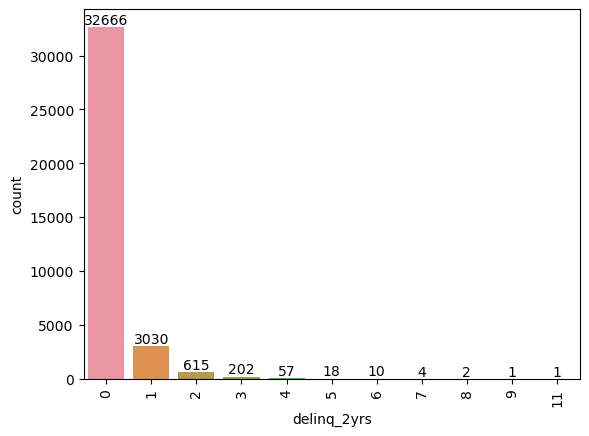

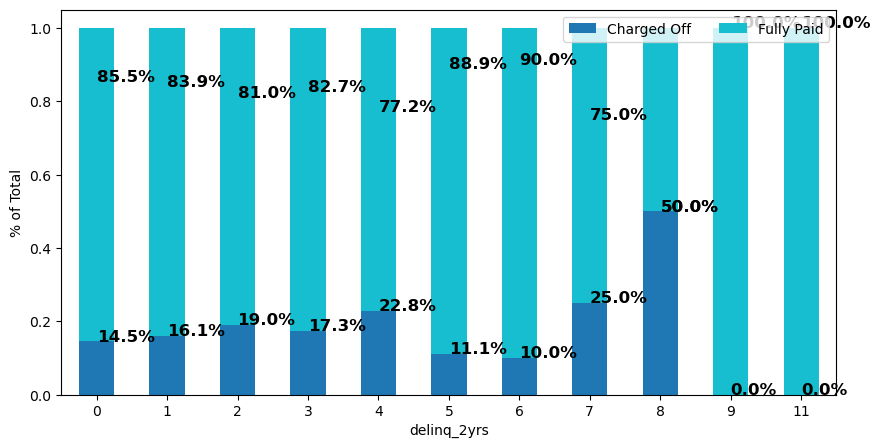

In [47]:
bycategory('delinq_2yrs')

byloanstatuspercent('delinq_2yrs')
plt.show()

**Observations:**
* Loans with more than 1 incidences of delinquency has higher rate of default

# Numerical Variables

In [48]:
final_data.select_dtypes(['int64','float64']).columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee'],
      dtype='object')

## Loan Amount

In [49]:
def plotnum(x):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(final_data[x])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=final_data[x], y=final_data['loan_status'], data=final_data)
    plt.show()

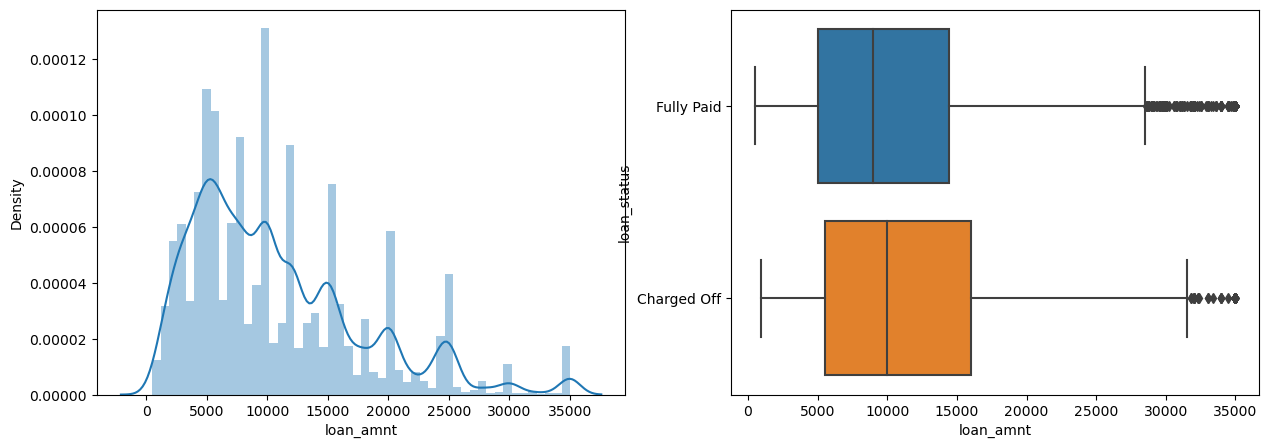

In [50]:
plotnum('loan_amnt')

In [51]:
final_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,11831.307849,7885.005738,900.0,5500.0,10000.0,16000.0,35000.0
Fully Paid,31204.0,10492.486540,6874.206549,500.0,5000.0,9000.0,14400.0,35000.0


**Observations:**
* The loan amount is right-skewed, where the median is less than the mean
* Defaulted loans are slightly on the higher side of the average loan amount

## Interest Rate

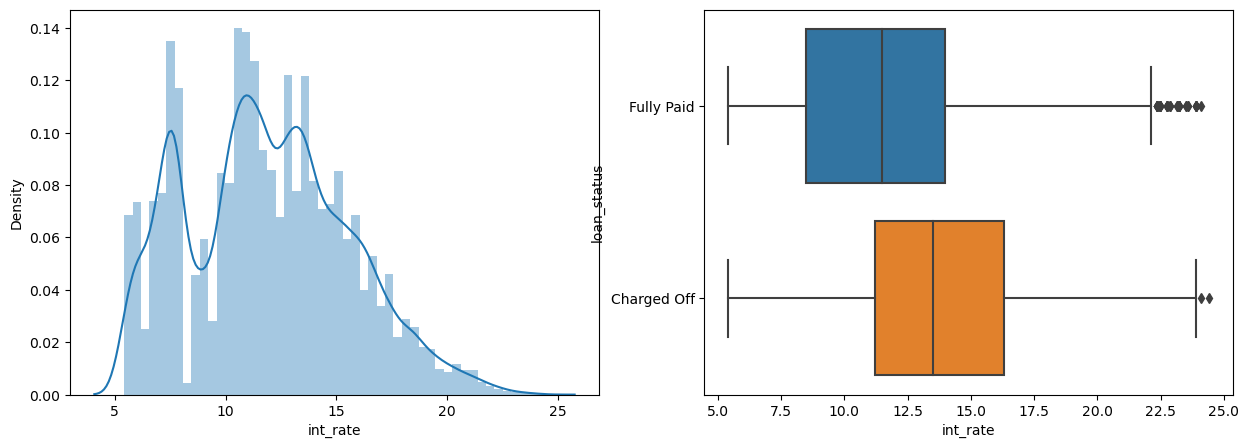

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,13.750241,3.630162,5.42,11.23,13.49,16.32,24.40
Fully Paid,31204.0,11.559999,3.574613,5.42,8.49,11.48,13.98,24.11


In [52]:
plotnum('int_rate')
final_data.groupby('loan_status')['int_rate'].describe()

**Observations:**
* Interest rates for defaulted loans are higher than fully paid ones. One inference can be that they are more likely to be the riskier loans

## Installment

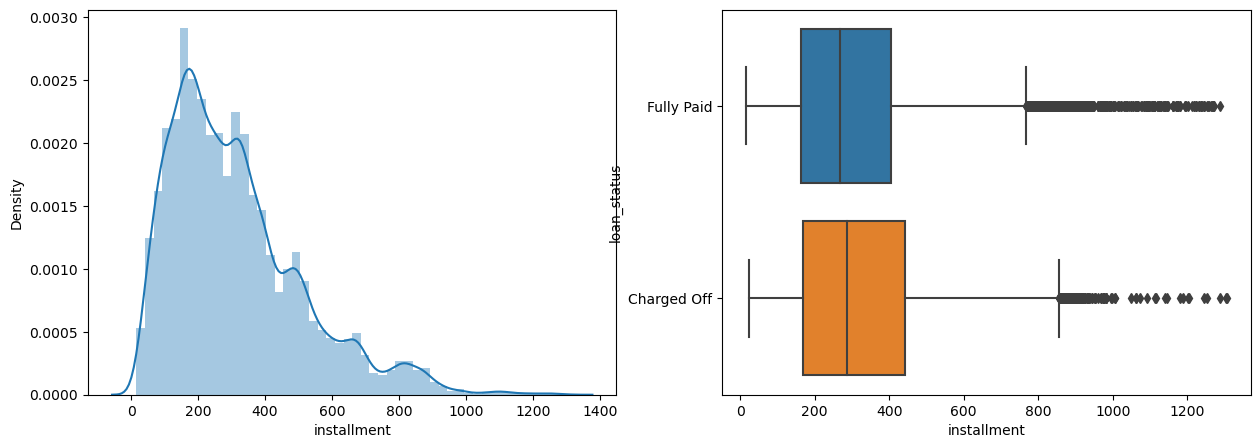

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,328.404472,210.612656,22.79,167.34,287.195,442.3450,1305.19
Fully Paid,31204.0,309.263973,197.069089,15.69,162.73,267.740,404.8275,1288.10


In [53]:
plotnum('installment')
final_data.groupby('loan_status')['installment'].describe()

**Observations:**
* Defaulted loans are likely to have slightly more installments then fully paid ones

## DTI

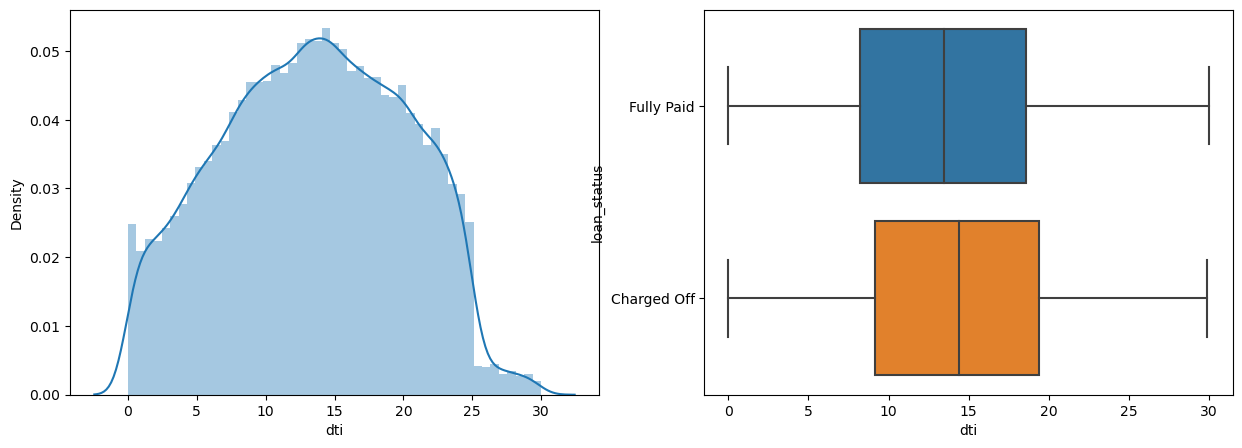

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,14.110500,6.586738,0.0,9.18,14.42,19.41,29.85
Fully Paid,31204.0,13.335826,6.666556,0.0,8.21,13.43,18.60,29.99


In [54]:
plotnum('dti')
final_data.groupby('loan_status')['dti'].describe()

In [85]:
plt.figure(figsize=(10,5))
bins = [0, 5, 10, 15, 20,30]
final_data['dti_groups'] = pd.cut(final_data['dti'], bins=bins,precision =0,labels=['0-5','5-10','10-15','15-20','20+'])

<Figure size 1000x500 with 0 Axes>

In [86]:
final_data[['dti','dti_groups']].head(25)

,dti,dti_groups
0,27.65,20+
1,1.00,0-5
2,8.72,5-10
3,20.00,15-20
5,11.20,10-15
6,23.51,20+
7,5.35,5-10
8,5.55,5-10
9,18.08,15-20
10,16.12,15-20


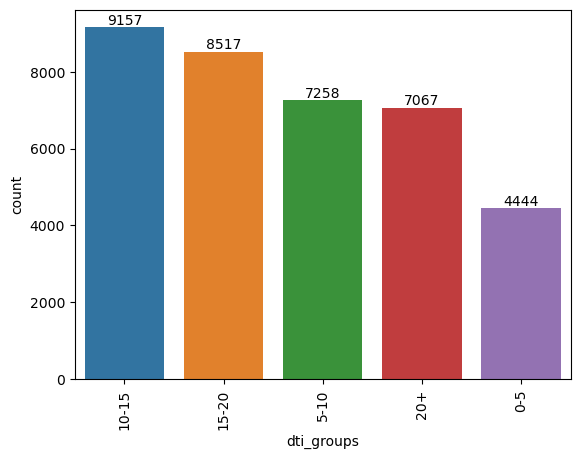

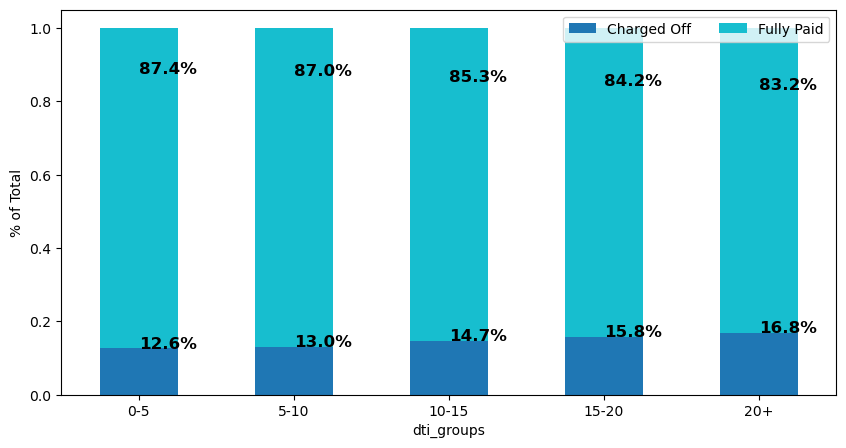

In [88]:
bycategory('dti_groups')
byloanstatuspercent('dti_groups')
plt.show()

**Observations:**
* Higher the dti higher the chances of loan being Charged Off

## Open Account

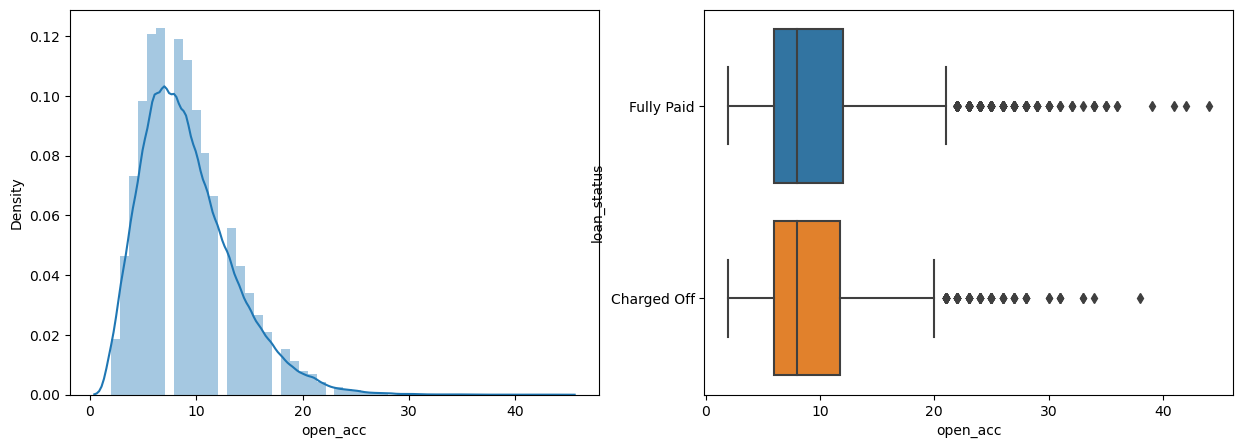

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,9.112366,4.467803,2.0,6.0,8.0,11.75,38.0
Fully Paid,31204.0,9.183598,4.331499,2.0,6.0,8.0,12.00,44.0


In [55]:
plotnum('open_acc')
final_data.groupby('loan_status')['open_acc'].describe()

**Observations:**
* No significant impact of open account on loan default

## Revolving Balance

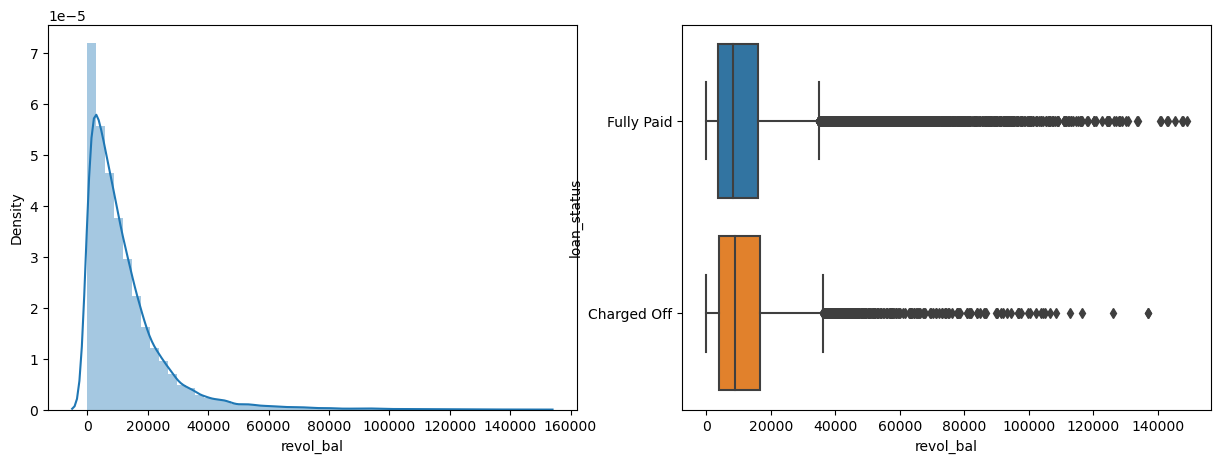

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,12758.845428,13676.128124,0.0,3926.75,8964.0,16810.75,137112.0
Fully Paid,31204.0,12253.028426,13783.792072,0.0,3505.75,8431.0,16049.00,149000.0


In [56]:
plotnum('revol_bal')
final_data.groupby('loan_status')['revol_bal'].describe()

**Observations:**
* No significant impact of revolving balance on loan default

## Revolving Utilization

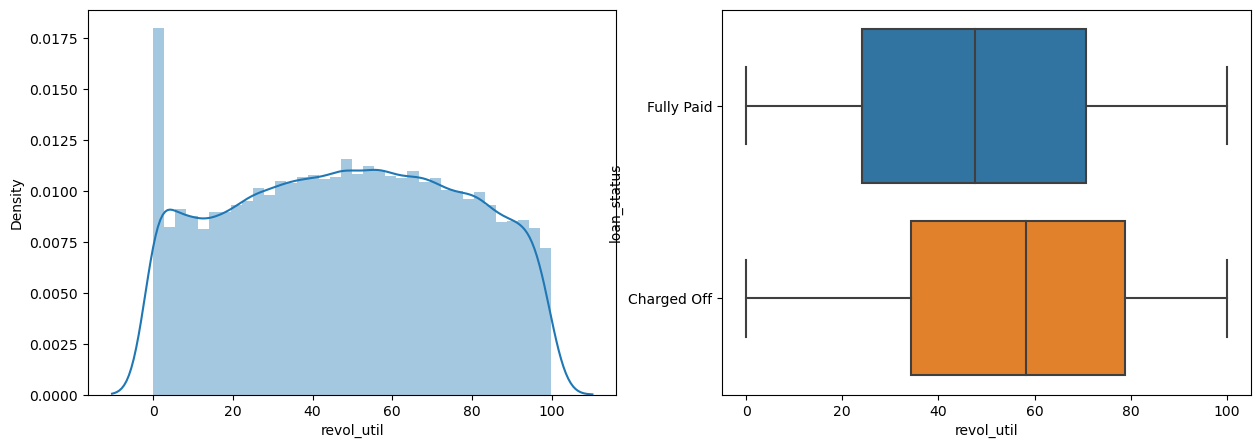

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,55.357288,27.883258,0.0,34.2,58.1,78.8,99.9
Fully Paid,31204.0,47.500270,28.190758,0.0,24.0,47.5,70.6,99.9


In [57]:
plotnum('revol_util')
final_data.groupby('loan_status')['revol_util'].describe()

## Total Account

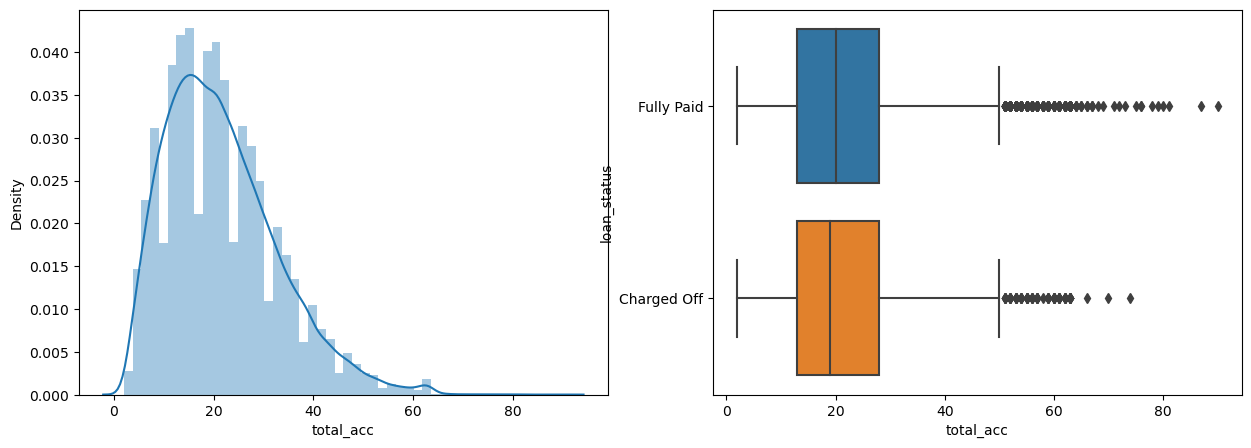

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,21.154572,11.309763,2.0,13.0,19.0,28.0,74.0
Fully Paid,31204.0,21.742373,11.213969,2.0,13.0,20.0,28.0,90.0


In [58]:
plotnum('total_acc')
final_data.groupby('loan_status')['total_acc'].describe()

## Total Payment

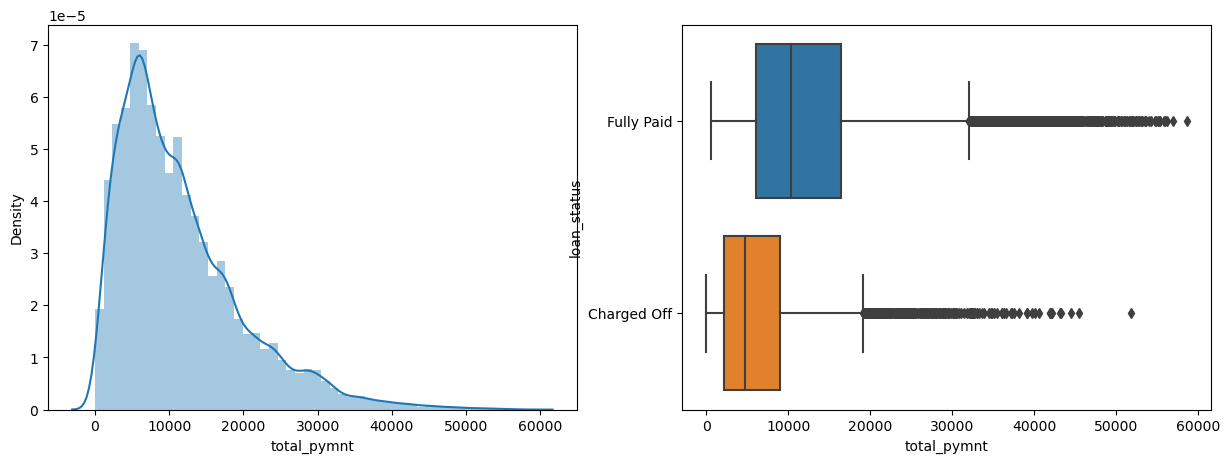

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,6651.839968,6398.596612,0.000000,2176.062500,4734.33500,8953.732500,51745.45000
Fully Paid,31204.0,12282.122925,8438.106580,526.332241,6025.198554,10338.31844,16437.338537,58563.67993


In [59]:
plotnum('total_pymnt')
final_data.groupby('loan_status')['total_pymnt'].describe()

**Observations:**
* the variable will not be available at the time of funding, hence, can be dropped

## Total Payment Invested

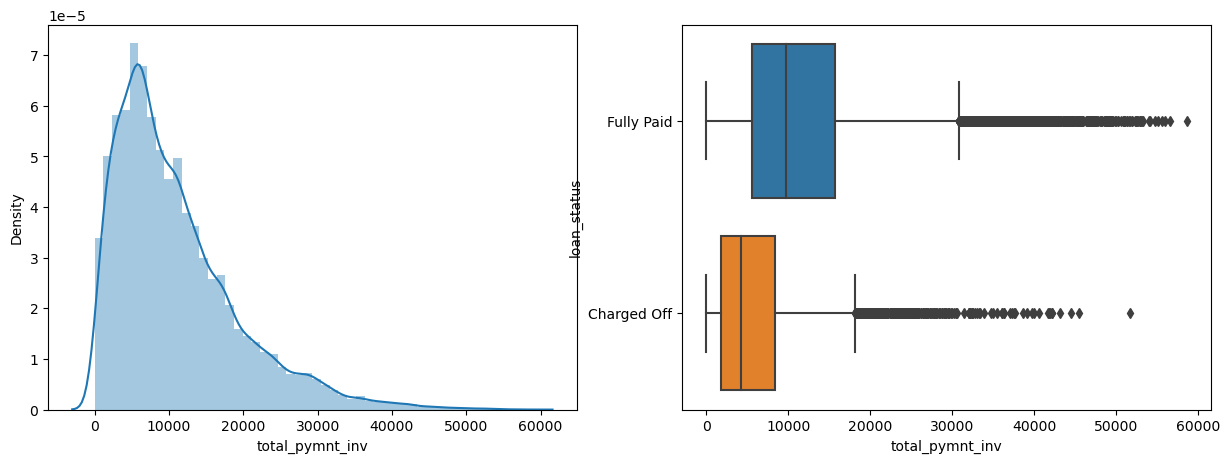

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,6195.819352,6266.214612,0.0,1845.0875,4224.145,8361.4000,51671.58
Fully Paid,31204.0,11689.672782,8343.557610,0.0,5632.2100,9715.780,15689.9925,58563.68


In [60]:
plotnum('total_pymnt_inv')
final_data.groupby('loan_status')['total_pymnt_inv'].describe()

**Observations:**
* the variable will not be available at the time of funding, hence, can be dropped

## total_rec_int

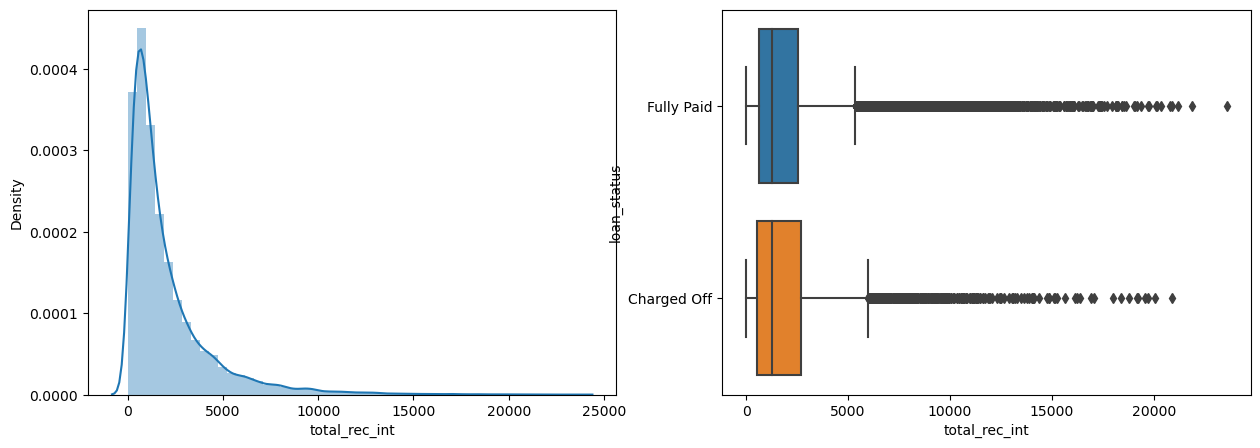

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5402.0,2124.620044,2455.964193,0.00,546.230,1254.050,2715.1850,20909.99
Fully Paid,31204.0,2020.990395,2241.249652,6.22,642.665,1263.595,2531.2525,23563.68


In [61]:
plotnum('total_rec_int')
final_data.groupby('loan_status')['total_rec_int'].describe()

**Observations:**
* the variable will not be available at the time of funding, hence, can be dropped

## Annual Income

In [81]:
plt.figure(figsize=(10,5))
bins = [0, 25000, 50000, 75000, 100000,150000]
final_data['annual_inc_groups'] = pd.cut(final_data['annual_inc'], bins=bins,precision =0,labels=['0-25000','25000-50000','50000-75000','75000-100000','100000+'])

<Figure size 1000x500 with 0 Axes>

In [82]:
final_data[['annual_inc','annual_inc_groups']].head(25)

,annual_inc,annual_inc_groups
0,24000.00,0-25000
1,30000.00,25000-50000
2,12252.00,0-25000
3,49200.00,25000-50000
5,36000.00,25000-50000
6,47004.00,25000-50000
7,48000.00,25000-50000
8,40000.00,25000-50000
9,15000.00,0-25000
10,72000.00,50000-75000


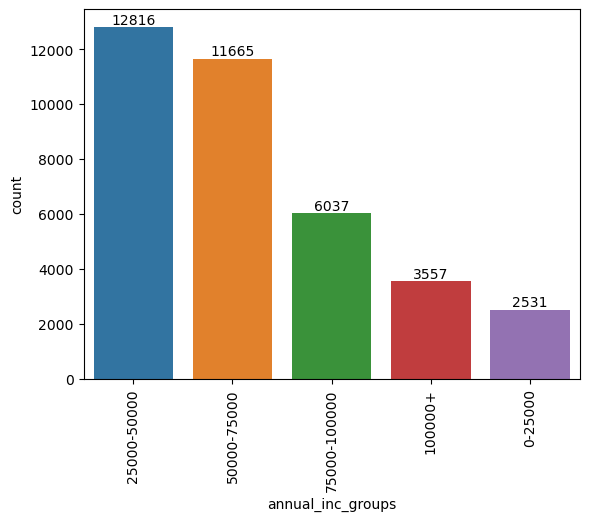

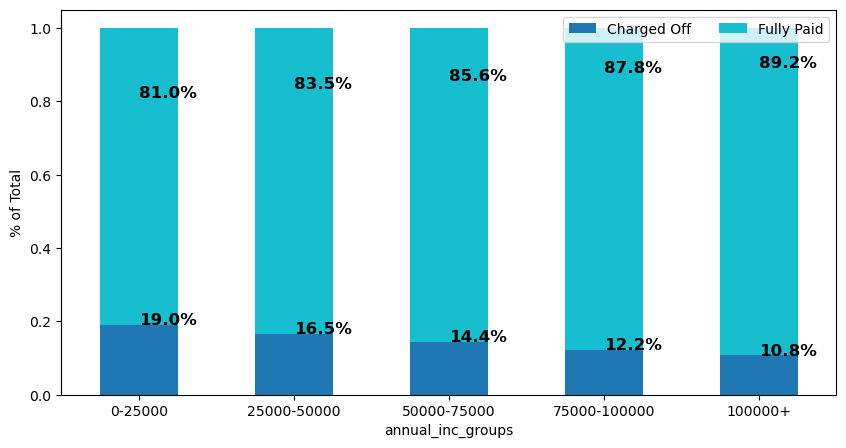

In [83]:
bycategory('annual_inc_groups')
byloanstatuspercent('annual_inc_groups')
plt.show()

**Observations:**
* Borrowers with income less than 25K are more likely to default
* Loan default decreases with higher annual income

## Bivariant Analysis

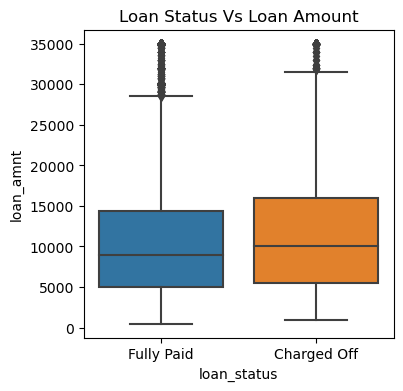

In [62]:
plt.figure(figsize=(4, 4))
plt.title("Loan Status Vs Loan Amount")
sns.boxplot(x=final_data["loan_status"],y=final_data["loan_amnt"])
plt.show()

**Observations:**
* Chances of getting loan amount charged off is more than fully paid.

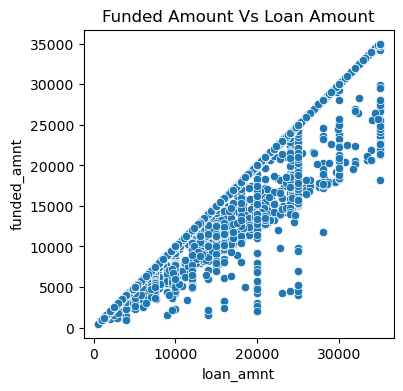

In [63]:
plt.figure(figsize=(4, 4))
plt.title("Funded Amount Vs Loan Amount")    
sns.scatterplot(x=final_data['loan_amnt'],y=final_data['funded_amnt'])
plt.show()

**Observations:**
* Funded amount by the company is always less than or equal to loan amount applied by borrower

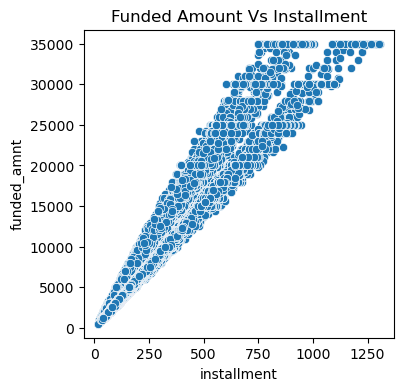

In [64]:
plt.figure(figsize=(4, 4))
plt.title("Funded Amount Vs Installment")    
sns.scatterplot(x=final_data['installment'],y=final_data['funded_amnt'])
plt.show()

**Observations:**
* Funded amount by the company is highly correlated with monthly installment paid by the borrower. 
* By this we can conclude there is a high correlation between loan amount, funded amount and installments


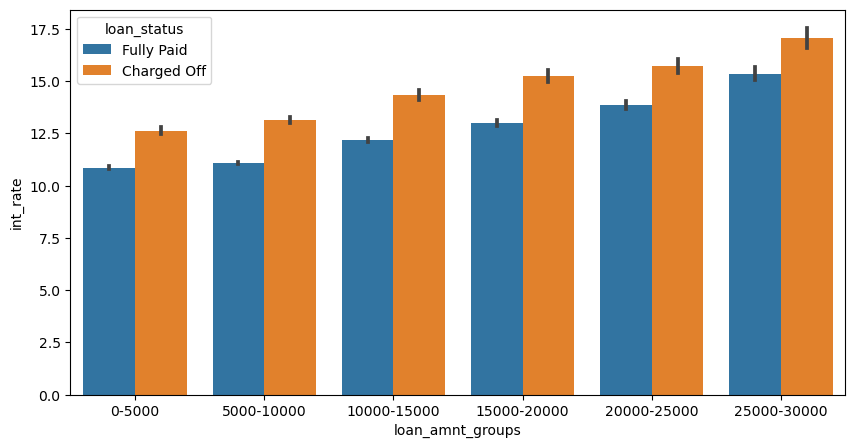

In [65]:
plt.figure(figsize=(10,5))
final_data['loan_amnt_groups'] = pd.cut(final_data['loan_amnt'], bins=6,precision =0,labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000'])
sns.barplot(data =final_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

**Observations:**
* There is a more probability of defaulting when applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %

<AxesSubplot: xlabel='emp_length', ylabel='loan_amnt'>

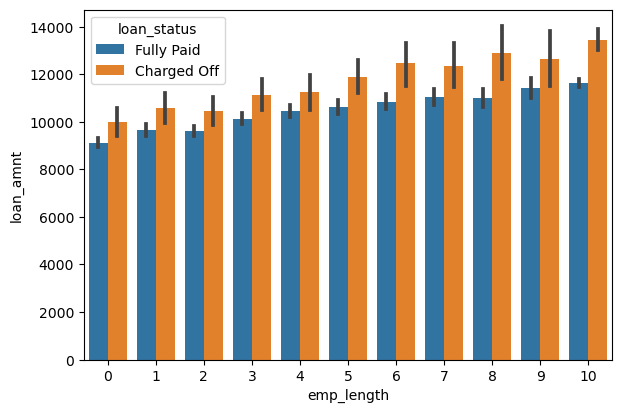

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data =final_data,y='loan_amnt', x='emp_length', hue ='loan_status')

**Observations:**
* Employees with tenure as 10 years usually takes loans of higher amount and the risk is also low as compared to other tenure

<AxesSubplot: xlabel='home_ownership', ylabel='loan_amnt'>

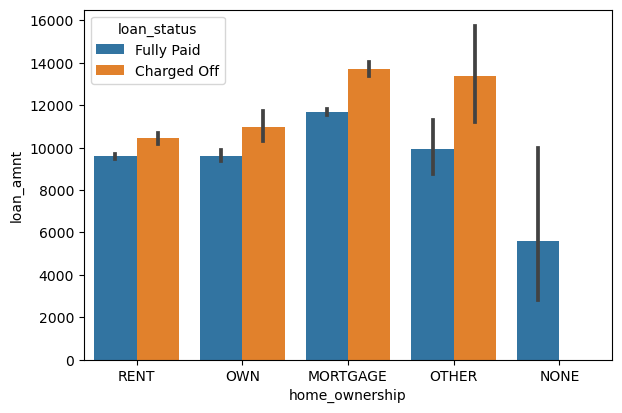

In [67]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data =final_data,y='loan_amnt', x='home_ownership', hue ='loan_status')

**Observations:**
* Loans for Individuals living on rent usually have a higher chance of getting defaulted as compared to others. Applicants whose home ownership is 'MORTGAGE are having more probability for getting loan charged off

## Multivariant Analysis

#### Buisness Driven Column 
#####  Convert loan_status to 0 for "Fully Paid" and 1 for "Charged Off"

In [68]:
final_data['loan_status_numeric'] = final_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

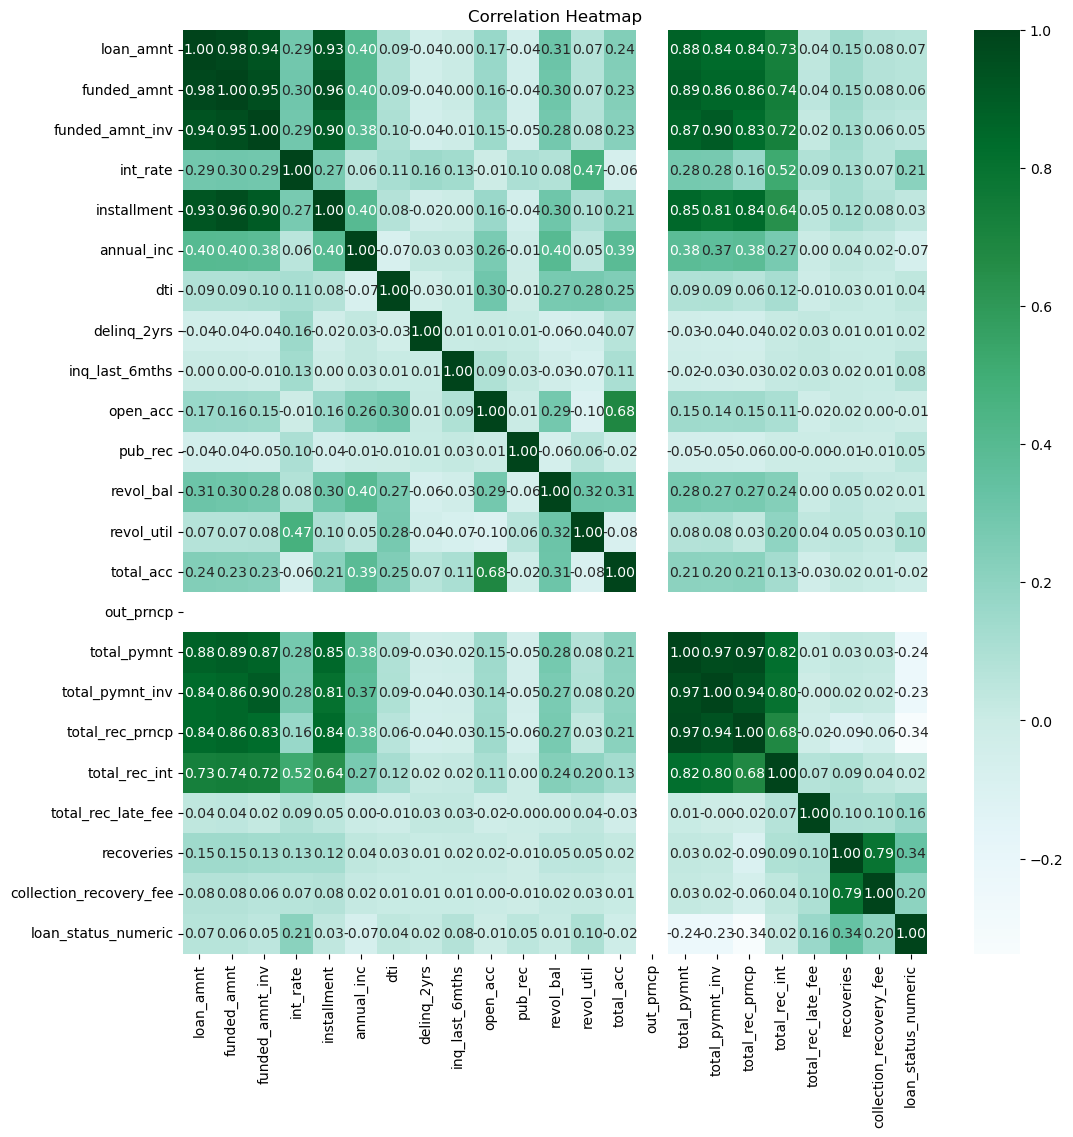

In [69]:
final_data_numeric = final_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = final_data_numeric.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
plt.show()

**Observations:**
* Looks like higher int_rate (0.21) can lead to high defaulters
* Higher recoveries (0.20) can lead to high defaulters
* Higher collection_recovery_fee (0.20) can lead to high defaulters
* Positive correlation can also be found on funded_amnt, funded_amnt_inv, installment, dti, delinq_2yrs, inq_last_6mnths, pub_rec, revol_bal, revol_util, total_rec_int, total_rec_late_fee, pub_rec_bankruptcies
* Very high correlation between loan amount applied by the borrower and funded amount committed by the investor. We can say that if loan application of the borrower gets passed by company, then he gets almost full amount of the loan applied.
* Certainly loan amount, monthly installment and principal received are highly correlated. Higher the loan amount, higher is monthly installment and and higher is principal received  vice versa.
* Number of open credit lines is also highly correlated with total number of credit lines in the borrower's credit file.  
* Revol_util, int_rate - Moderately high correlation
* Higher the amount of credit the borrower is using, higher is the risk of loan repayment. Thats why higher is the interest rate, and vice-versa.
